In [1]:
import numpy as np
from graph import Graph
import  matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPoint
from polygons import Polygons
from energy import Energy
from search import MC

In [2]:
graph = Graph.fully(4)

In [3]:
polygon_object = Polygons(graph)

<AxesSubplot:>

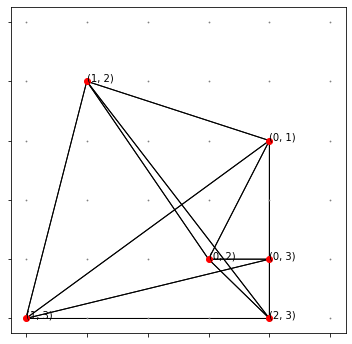

In [4]:
fig,ax=plt.subplots(ncols=1, figsize=(6,6))
polygon_object.visualize(ax, polygon_object.get_all_polyg_coords())

energy 0.017982860568420234
energy 0.0075017348088538055
CPU times: user 546 ms, sys: 28.7 ms, total: 575 ms
Wall time: 533 ms


<AxesSubplot:>

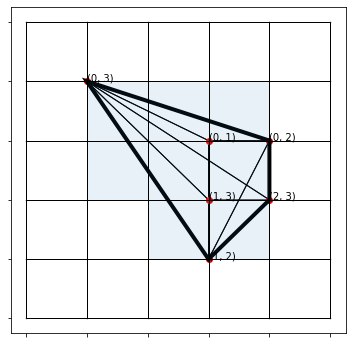

In [5]:
%%time
E = Energy(polygon_object)(polygon_object)
for i in range(1000):
    polygon_object = Polygons(graph)
    fit = Energy(polygon_object)
    E_current = fit(polygon_object)
    if E_current < E:
        E = E_current
        best_polygon_object = polygon_object
        print('energy {}'.format(E_current))
        
fit = Energy(best_polygon_object)
fig,ax=plt.subplots(ncols=1, figsize=(6, 6))
#einhüllende
patch = plt.Polygon(fit.envelop_polygon, fill=False, lw=4)
ax.add_patch(patch)
#einheitsquadrate im hintergrund mit intersection in blue
for square in zip(fit.intersection_array().flatten(), best_polygon_object.get_grid_of_unit_squares(fit.K)):
    patch_fill = plt.Polygon(square[1], fill=square[0], lw=0, alpha=0.1)
    patch = plt.Polygon(square[1], fill=False, lw=1)
    ax.add_patch(patch_fill)
    ax.add_patch(patch)
#layout
best_polygon_object.visualize(ax, best_polygon_object.get_all_polyg_coords())

In [22]:
polygon_object = Polygons(graph)
mc = MC(polygon_object)

In [23]:
mc.apply_contract(1020)

In [17]:
mc.apply_swap(900)

<AxesSubplot:>

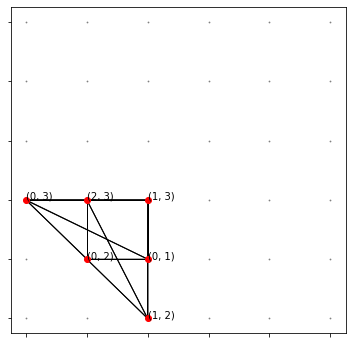

In [24]:
fig,ax=plt.subplots(ncols=1, figsize=(6,6))
mc.polygon.visualize(ax, mc.polygon.get_all_polyg_coords())

In [25]:
fit = Energy(mc.polygon)

In [26]:
for c in mc.polygon.get_all_polyg_coords():
    if len(c) == 4:
        print('pla4', mc.polygon.is_unit_square(c), c)
    else:
        print('plaq3', mc.polygon.is_unit_triangle(c), c)

plaq3 0.0 [(2, 1), (2, 0), (1, 1)]
plaq3 1.8218544151266949 [(2, 1), (2, 2), (0, 2)]
plaq3 0.0 [(1, 1), (1, 2), (0, 2)]
plaq3 1.8218544151266949 [(2, 0), (1, 2), (2, 2)]
pla4 2.4721359549995796 [(2, 1), (2, 0), (1, 2), (0, 2)]
pla4 0.0 [(2, 1), (2, 2), (1, 2), (1, 1)]
pla4 2.82842712474619 [(1, 1), (2, 0), (2, 2), (0, 2)]


In [27]:
fit(mc.polygon)

0.004001526122779681

In [28]:
graph.num_constrains()

3

<AxesSubplot:>

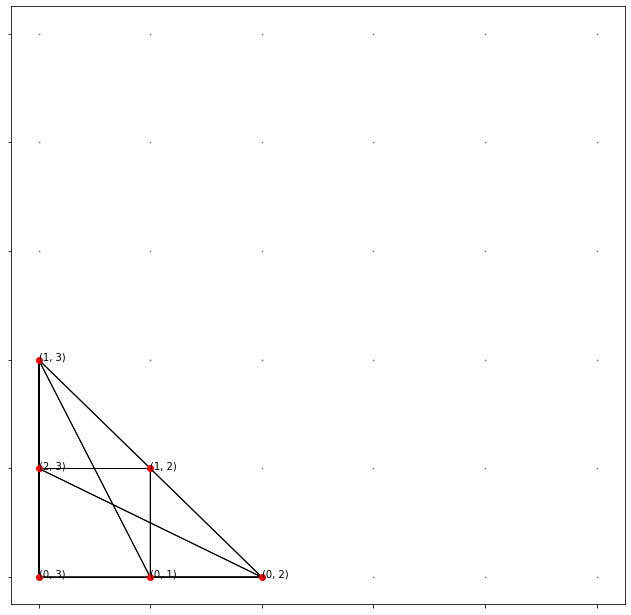

In [29]:
polygon_object = Polygons(graph)
fig,ax=plt.subplots(ncols=1, figsize=(11,11))
qbits = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
lhz_coords = [(1,0), (2,0), (0,0), (1,1), (0,2), (0,1)]
polygon_object.update_qbits_coords(qbits, lhz_coords)
polygon_object.visualize(ax, polygon_object.get_all_polyg_coords())

In [30]:
fit = Energy(polygon_object)

In [31]:
fit(polygon_object)

0.004001526122779681

In [32]:
fit.is_plaquette()

[0.0,
 1.8218544151266949,
 1.8218544151266949,
 0.0,
 0.0,
 2.4721359549995796,
 2.82842712474619]

In [33]:
for c, i in zip(polygon_object.get_all_polyg_coords(), polygon_object.polygon_weights(fit.is_plaquette())):
    if len(c) == 4:
        print('pla4', polygon_object.is_unit_square(c), c, i)
    else:
        print('plaq3', polygon_object.is_unit_triangle(c), c, i)

plaq3 0.0 [(1, 0), (1, 1), (2, 0)] 0.9993811491642254
plaq3 1.8218544151266949 [(1, 0), (0, 2), (0, 0)] 0.0005491006978322974
plaq3 1.8218544151266949 [(2, 0), (0, 1), (0, 0)] 0.0005491006978322974
plaq3 0.0 [(1, 1), (0, 1), (0, 2)] 0.9993811491642254
pla4 0.0 [(1, 0), (1, 1), (0, 1), (0, 0)] 0.9993811491642254
pla4 2.4721359549995796 [(1, 0), (0, 2), (0, 1), (2, 0)] 0.00040466282959550673
pla4 2.82842712474619 [(2, 0), (1, 1), (0, 2), (0, 0)] 0.00035368828206407826


In [34]:
a = np.array([-1, 0, 1, 2, 3], dtype=float)
b = np.array([ 0, 0, 0.1, 11, 2], dtype=float)

# If you don't pass `out` the indices where (b == 0) will be uninitialized!
c = np.divide(a, b, out=(np.ones_like(a)*999), where=(b!=0))

In [ ]:
c = c / (c.sum()/3)

In [ ]:
c.sum()